<a href="https://colab.research.google.com/github/saipragna25/deep-learning-asgn1/blob/main/DLA1_tabular_learner_for_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai==1.0.61

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from fastai import *
import pandas as pd
from fastai.tabular import *


train = pd.read_csv('/content/titanicdataset.csv')
train.head()

test = pd.read_csv('/content/titanicdataset.csv')
test.isnull().sum()

# Fast ai sometimes wants us to
# fix the na manually in test
test["Fare"] = test["Fare"].fillna(value =0)

In [9]:
from fastai.tabular.data import TabularList

dep_var = 'Survived'
#cat_names = data.select_dtypes(exclude=['int', 'float']).columns
cat_names = [ 'Sex', 'Ticket', 'Cabin', 'Embarked']

#cont_names = data.select_dtypes([np.number]).columns
cont_names = [ 'Age', 'SibSp', 'Parch', 'Fare']

# Transformations
procs = [FillMissing, Categorify, Normalize]

# Test Tabular List
test = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs)

# Train Data Bunch
data = (TabularList.from_df(train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_idx(list(range(0,200)))
                        .label_from_df(cols = dep_var)
                        .add_test(test, label=0)
                        .databunch())

data.show_batch(rows=10)

Sex,Ticket,Cabin,Embarked,Age_na,Age,SibSp,Parch,Fare,target
male,WE/P 5735,B22,S,False,3.1288,0.5043,0.8064,0.7090,0
male,2699,#na#,C,False,-0.3084,-0.4610,-0.4658,-0.2798,1
female,2653,#na#,C,False,-2.2614,-0.4610,2.0785,-0.3374,1
male,PC 17582,C91,S,False,0.6290,-0.4610,0.8064,2.2706,0
male,C 7076,#na#,S,False,0.0040,-0.4610,-0.4658,-0.4982,0
male,28664,#na#,S,False,0.3165,0.5043,-0.4658,-0.2379,0
male,2686,#na#,C,True,-0.0741,-0.4610,-0.4658,-0.4986,0
male,2663,#na#,C,False,-0.7772,-0.4610,-0.4658,-0.4986,1
male,1601,#na#,S,True,-0.0741,-0.4610,-0.4658,0.4343,1
female,113806,E8,S,False,0.2384,0.5043,-0.4658,0.3700,1


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.670584,0.688113,0.630000,00:00
1,0.616340,0.706223,0.400000,00:00
2,0.590668,0.693554,0.520000,00:00
3,0.575206,0.671578,0.605000,00:00
4,0.549500,0.673839,0.615000,00:00
5,0.504565,0.578444,0.735000,00:00
6,0.458054,0.533043,0.735000,00:00
7,0.409185,0.520939,0.775000,00:00
8,0.360830,0.500631,0.770000,00:00
9,0.316518,0.445729,0.805000,00:00


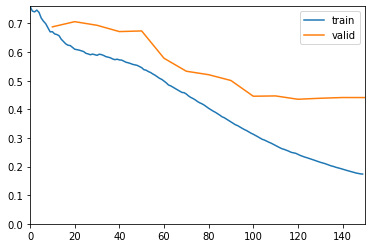

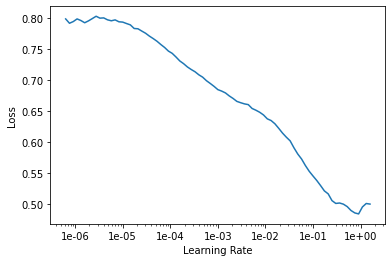

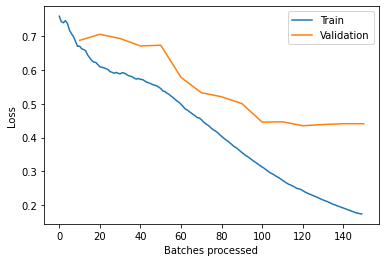

In [14]:
# Create deep learning model
learn = tabular_learner(data, layers=[1000, 200, 15], metrics=accuracy, emb_drop=0.1, callback_fns=ShowGraph)

# select the appropriate learning rate
learn.lr_find()

# we typically find the point where the slope is steepest
learn.recorder.plot()

# Fit the model based on selected learning rate
learn.fit_one_cycle(15, max_lr=slice(1e-03))

# Analyse our model
learn.model
learn.recorder.plot_losses()